# Component antenna array

This example shows how to create an antenna array using 3D components for the unit
cell definition. You will see how to set
up the analysis, generates the EM solution, and post-process the solution data
using Matplotlib and
PyVista. This example runs only on Windows using CPython.

Keywords: **HFSS**, **antenna array**, **3D components**, **far field**.

## Prerequisites

### Perform imports

In [1]:
import os
import tempfile
import time

from ansys.aedt.core import Hfss
from ansys.aedt.core.visualization.advanced.farfield_visualization import \
    FfdSolutionData
from ansys.aedt.core.examples.downloads import download_3dcomponent
from ansys.aedt.core.generic import file_utils

### Define constants
Constants help ensure consistency and avoid repetition throughout the example.

In [2]:
AEDT_VERSION = "2025.2"
NUM_CORES = 4
NG_MODE = False  # Open AEDT UI when it is launched.

### Create temporary directory

Create a temporary working directory.
The name of the working folder is stored in ``temp_folder.name``.

> **Note:** The final cell in the notebook cleans up the temporary folder. If you want to
> retrieve the AEDT project and data, do so before executing the final cell in the notebook.


In [3]:
temp_folder = tempfile.TemporaryDirectory(suffix=".ansys")

### Download 3D component
Download the 3D component that will be used to define
the unit cell in the antenna array.

In [4]:
path_to_3dcomp = download_3dcomponent(local_path=temp_folder.name)

### Launch HFSS

The following cell creates a new ``Hfss`` object. Electronics desktop is launched and
a new HFSS design is inserted into the project.

In [5]:
project_name = os.path.join(temp_folder.name, "array.aedt")
hfss = Hfss(
    project=project_name,
    version=AEDT_VERSION,
    design="Array_Simple",
    non_graphical=NG_MODE,
    new_desktop=False,  # Set to `False` to connect to an existing AEDT session.
)

print("Project name " + project_name)

PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)].


PyAEDT INFO: PyAEDT version 0.22.dev0.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: Log on console is enabled.


PyAEDT INFO: Log on file C:\Users\ansys\AppData\Local\Temp\pyaedt_ansys_eec58c9d-b3ad-4f93-8d92-949908260c82.log is enabled.


PyAEDT INFO: Log on AEDT is disabled.


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Launching PyAEDT with gRPC plugin.


PyAEDT INFO: New AEDT session is starting on gRPC port 52396.


PyAEDT INFO: Electronics Desktop started on gRPC port: 52396 after 11.09598994255066 seconds.


PyAEDT INFO: AEDT installation Path C:\Program Files\ANSYS Inc\v252\AnsysEM


PyAEDT INFO: Ansoft.ElectronicsDesktop.2025.2 version started with process ID 7920.


PyAEDT INFO: Project array has been created.


PyAEDT INFO: Added design 'Array_Simple' of type HFSS.


PyAEDT INFO: Aedt Objects correctly read


Project name C:\Users\ansys\AppData\Local\Temp\tmp0fo27oa1.ansys\array.aedt


### Read array definition

Read array definition from the JSON file.

In [6]:
array_definition = file_utils.read_json(
    os.path.join(path_to_3dcomp, "array_simple.json")
)

### Add the 3D component definition

The JSON file links the unit cell to the 3D component
named "Circ_Patch_5GHz1".
This can be seen by examining ``array_definition["cells"]``. The following
code prints the row and column indices of the array elements along with the name
of the 3D component for each element.

> **Note:** The ``array_definition["cells"]`` is of type ``dict`` and the key
> is builta as a string from the _(row, column)_ indices of the array element. For example:
> the key for the element in the first row and 2nd column is ``"(1,2)"``.

In [7]:
print("Element\t\tName")
print("--------\t-------------")
for cell in array_definition["cells"]:
    cell_name = array_definition["cells"][cell]["name"]
    print(f"{cell}\t\t'{cell_name}'.")

Element		Name
--------	-------------
(1,1)		'Circ_Patch_5GHz1'.
(1,2)		'Circ_Patch_5GHz1'.
(1,3)		'Circ_Patch_5GHz1'.
(2,1)		'Circ_Patch_5GHz1'.
(2,2)		'Circ_Patch_5GHz1'.
(2,3)		'Circ_Patch_5GHz1'.
(3,1)		'Circ_Patch_5GHz1'.
(3,2)		'Circ_Patch_5GHz1'.
(3,3)		'Circ_Patch_5GHz1'.


Each unit cell is defined by a 3D Component. The 3D component may be added
to the HFSS design using the method
[Hfss.modeler.insert_3d_component()](https://aedt.docs.pyansys.com/version/stable/API/_autosummary/ansys.aedt.core.modeler.modeler_3d.Modeler3D.insert_3d_component.html)
or it can be added as a key to the ``array_definition`` as shown below.

In [8]:
array_definition["Circ_Patch_5GHz1"] = os.path.join(path_to_3dcomp, "Circ_Patch_5GHz.a3dcomp")

Note that the 3D component name is identical to the value for each element
in the ``"cells"`` dictionary. For example,
``array_definition["cells"][0][0]["name"]

### Create the 3D component array in HFSS

The array is now generated in HFSS from the information in
``array_definition``.
If a 3D component is not available in the design, it is loaded
into the dictionary from the path that you specify. The following
code edits the dictionary to point to the location of the ``A3DCOMP`` file.

In [9]:
array = hfss.add_3d_component_array_from_json(array_definition, name="circ_patch_array")

PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Parsing C:\Users\ansys\AppData\Local\Temp\tmp0fo27oa1.ansys\array.aedt.


PyAEDT INFO: File C:\Users\ansys\AppData\Local\Temp\tmp0fo27oa1.ansys\array.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.01607203483581543


PyAEDT WARNING: Name Circ_Patch_5GHz1 already assigned in the design


PyAEDT INFO: Project array Saved correctly


PyAEDT INFO: Parsing C:\Users\ansys\AppData\Local\Temp\tmp0fo27oa1.ansys\array.aedt.


PyAEDT INFO: File C:\Users\ansys\AppData\Local\Temp\tmp0fo27oa1.ansys\array.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.07737088203430176


### Modify cells

Make the center element passive and rotate the corner elements.

In [10]:
array.cells[1][1].is_active = False
array.cells[0][0].rotation = 90
array.cells[0][2].rotation = 90
array.cells[2][0].rotation = 90
array.cells[2][2].rotation = 90

### Set up simulation and run analysis

Set up a simulation and analyze it.

In [11]:
setup = hfss.create_setup()
setup.props["Frequency"] = "5GHz"
setup.props["MaximumPasses"] = 3
hfss.analyze(cores=NUM_CORES)

PyAEDT INFO: Project array Saved correctly


PyAEDT INFO: Key Desktop/ActiveDSOConfigurations/HFSS correctly changed.


PyAEDT INFO: Solving all design setups. Analysis started...


PyAEDT INFO: Design setup None solved correctly in 0.0h 0.0m 42.0s


PyAEDT INFO: Key Desktop/ActiveDSOConfigurations/HFSS correctly changed.


True

## Postprocess

### Retrieve far-field data

Get far-field data. After the simulation completes, the far
field data is generated port by port and stored in a data class.

In [12]:
ffdata = hfss.get_antenna_data(setup=hfss.nominal_adaptive, sphere="Infinite Sphere1")

PyAEDT INFO: Far field sphere Infinite Sphere1 is created.


PyAEDT INFO: Parsing C:\Users\ansys\AppData\Local\Temp\tmp0fo27oa1.ansys\array.aedt.


PyAEDT INFO: File C:\Users\ansys\AppData\Local\Temp\tmp0fo27oa1.ansys\array.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.06316590309143066


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Solution Data Correctly Loaded.


Time to initialize solution data:0.01001596450805664


Time to initialize solution data:0.019771099090576172
PyAEDT INFO: Exporting antenna metadata...


PyAEDT INFO: Antenna metadata exported.


PyAEDT INFO: Exporting geometry...


PyAEDT INFO: Exporting embedded element patterns.... Done: 1.168752670288086 seconds


### Generate contour plot

Generate a contour plot. You can define the Theta scan and Phi scan.

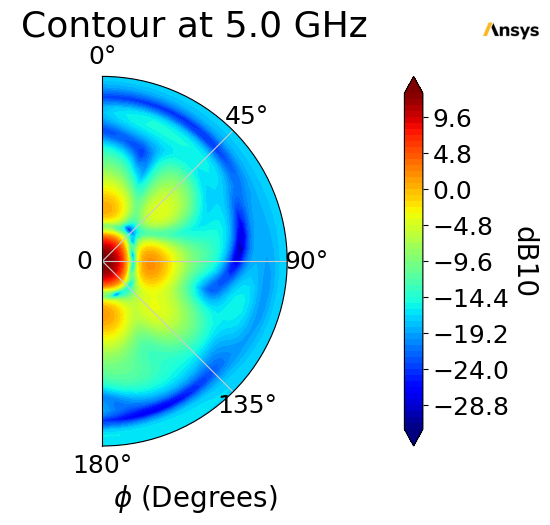

In [13]:
ffdata.farfield_data.plot_contour(
    quantity="RealizedGain",
    title=f"Contour at {ffdata.farfield_data.frequency * 1E-9:0.1f} GHz"
)

### Save the project and data

Farfield data can be accessed from disk after the solution has been generated
using the ``metadata_file`` property of ``ffdata``.

In [14]:
metadata_file = ffdata.metadata_file
working_directory = hfss.working_directory

hfss.save_project()
hfss.release_desktop()
# Wait 3 seconds to allow AEDT to shut down before cleaning the temporary directory.
time.sleep(3)

PyAEDT INFO: Project array Saved correctly


PyAEDT INFO: Desktop has been released and closed.


### Load far field data

An instance of the ``FfdSolutionData`` class
can be instantiated from the metadata file. Embedded element
patters are linked through the metadata file.

In [15]:
ffdata = FfdSolutionData(input_file=metadata_file)

## Generate contour plot

Generate a contour plot. You can define the Theta scan
and Phi scan.

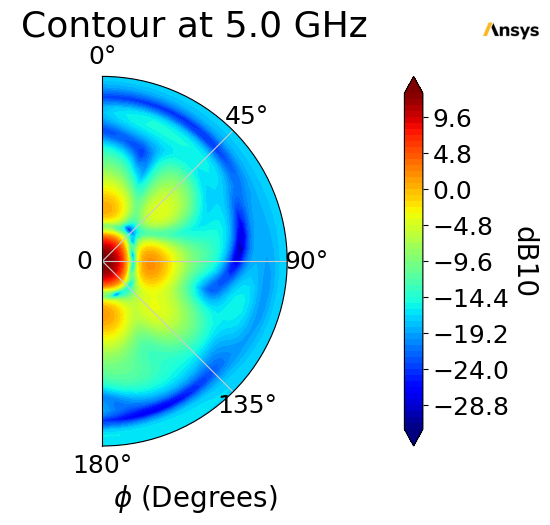

In [16]:
ffdata.plot_contour(
    quantity="RealizedGain", title=f"Contour at {ffdata.frequency * 1e-9:.1f} GHz"
)

### Generate 2D cutout plots

Generate 2D cutout plots. You can define the Theta scan
and Phi scan.

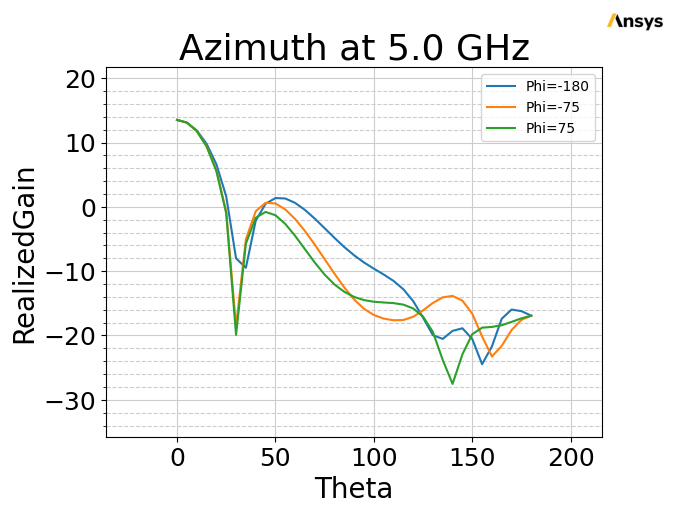

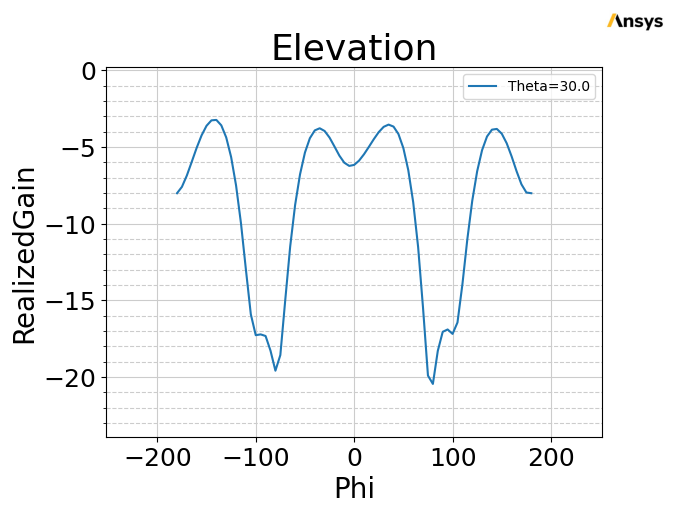

In [17]:
ffdata.plot_cut(
    quantity="RealizedGain",
    primary_sweep="theta",
    secondary_sweep_value=[-180, -75, 75],
    title=f"Azimuth at {ffdata.frequency * 1E-9:.1f} GHz",
    quantity_format="dB10",
)

ffdata.plot_cut(
    quantity="RealizedGain",
    primary_sweep="phi",
    secondary_sweep_value=30,
    title="Elevation",
    quantity_format="dB10",
)

### Generate 3D plot

Generate 3D plots. You can define the Theta scan and Phi scan.

In [18]:
ffdata.plot_3d(
    quantity="RealizedGain",
    output_file=os.path.join(working_directory, "Image.jpg"),
    show=False,
)

EmbeddableWidget(value='<iframe srcdoc="<!DOCTYPE html>\n<html>\n  <head>\n    <meta http-equiv=&quot;Content-…

### Clean up

All project files are saved in the folder ``temp_folder.name``.
If you've run this example as a Jupyter notebook, you
can retrieve those project files. The following cell
removes all temporary files, including the project folder.

In [19]:
temp_folder.cleanup()